In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/college-student-placement-factors-dataset/college_student_placement_dataset.csv')

In [3]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [4]:
data.shape

(10000, 10)

In [5]:
list(data.columns)

['College_ID',
 'IQ',
 'Prev_Sem_Result',
 'CGPA',
 'Academic_Performance',
 'Internship_Experience',
 'Extra_Curricular_Score',
 'Communication_Skills',
 'Projects_Completed',
 'Placement']

In [6]:
data[data.columns[0]] = data[data.columns[0]].apply(lambda x: int(x[3:]))

In [7]:
data

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,30,107,6.61,6.28,8,No,8,8,4,No
1,61,97,5.52,5.37,8,No,7,8,0,No
2,36,109,5.36,5.83,9,No,3,1,1,No
3,55,122,5.47,5.75,6,Yes,1,6,1,No
4,4,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,21,119,8.41,8.29,4,No,1,8,0,Yes
9996,98,70,9.25,9.34,7,No,0,7,2,No
9997,66,89,6.08,6.25,3,Yes,3,9,5,No
9998,45,107,8.77,8.92,3,No,7,5,1,No


In [8]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,30,107,6.61,6.28,8,No,8,8,4,No
1,61,97,5.52,5.37,8,No,7,8,0,No
2,36,109,5.36,5.83,9,No,3,1,1,No
3,55,122,5.47,5.75,6,Yes,1,6,1,No
4,4,96,7.91,7.69,7,No,8,10,2,No


In [9]:
no_yes_dict = {"No":0,"Yes":1}

In [10]:
data[data.columns[5]]  = data[data.columns[5]].map(no_yes_dict)
data[data.columns[-1]]  = data[data.columns[-1]].map(no_yes_dict)

In [11]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,30,107,6.61,6.28,8,0,8,8,4,0
1,61,97,5.52,5.37,8,0,7,8,0,0
2,36,109,5.36,5.83,9,0,3,1,1,0
3,55,122,5.47,5.75,6,1,1,6,1,0
4,4,96,7.91,7.69,7,0,8,10,2,0


In [12]:
corr_matrix = data.corr()

In [13]:
corr_matrix

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
College_ID,1.000000,0.002473,-0.004060,-0.003422,-0.015442,0.012037,-0.003931,-0.005194,0.004903,0.002750
IQ,0.002473,1.000000,-0.002640,-0.002859,-0.006827,-0.000247,-0.003458,-0.010896,0.014538,0.285914
Prev_Sem_Result,-0.004060,-0.002640,1.000000,0.980768,-0.005765,-0.013347,0.009326,-0.017269,0.018434,0.317896
CGPA,-0.003422,-0.002859,0.980768,1.000000,-0.002958,-0.012562,0.011441,-0.018242,0.020872,0.321607
Academic_Performance,-0.015442,-0.006827,-0.005765,-0.002958,1.000000,0.025903,0.011774,-0.019733,-0.013148,-0.014920
Internship_Experience,0.012037,-0.000247,-0.013347,-0.012562,0.025903,1.000000,0.002093,-0.020437,-0.010260,-0.005841
Extra_Curricular_Score,-0.003931,-0.003458,0.009326,0.011441,0.011774,0.002093,1.000000,0.003769,0.008122,-0.004740
Communication_Skills,-0.005194,-0.010896,-0.017269,-0.018242,-0.019733,-0.020437,0.003769,1.000000,-0.004486,0.323155
Projects_Completed,0.004903,0.014538,0.018434,0.020872,-0.013148,-0.010260,0.008122,-0.004486,1.000000,0.217499
Placement,0.002750,0.285914,0.317896,0.321607,-0.014920,-0.005841,-0.004740,0.323155,0.217499,1.000000


<Axes: >

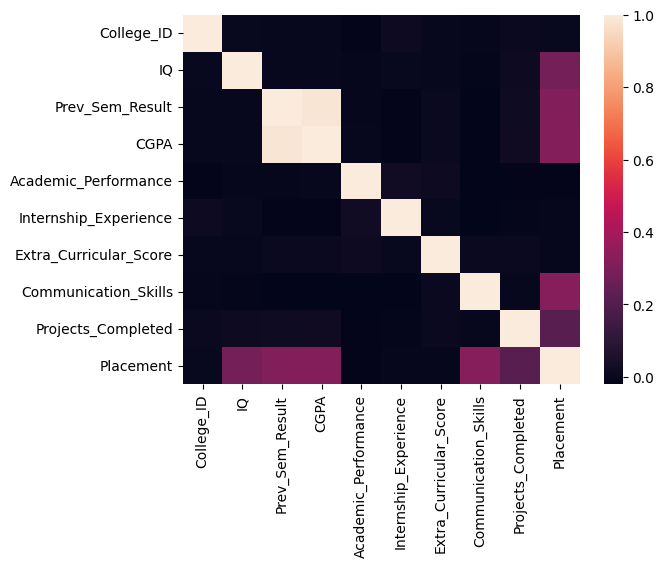

In [23]:
sns.heatmap(corr_matrix)

In [15]:
feature_selected_data = data.iloc[0:10000,[1,2,3,7,8,9]]

In [16]:
feature_selected_data

,IQ,Prev_Sem_Result,CGPA,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,4,0
1,97,5.52,5.37,8,0,0
2,109,5.36,5.83,1,1,0
3,122,5.47,5.75,6,1,0
4,96,7.91,7.69,10,2,0
...,...,...,...,...,...,...
9995,119,8.41,8.29,8,0,1
9996,70,9.25,9.34,7,2,0
9997,89,6.08,6.25,9,5,0
9998,107,8.77,8.92,5,1,0


<Axes: >

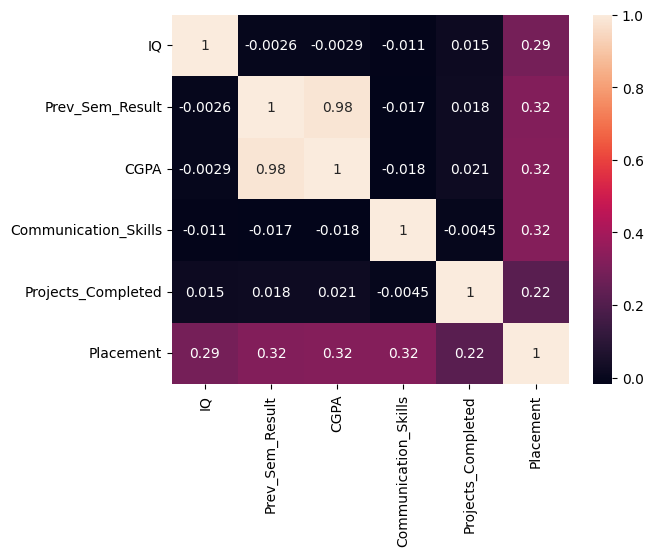

In [24]:
sns.heatmap(feature_selected_data.corr(),annot = True)

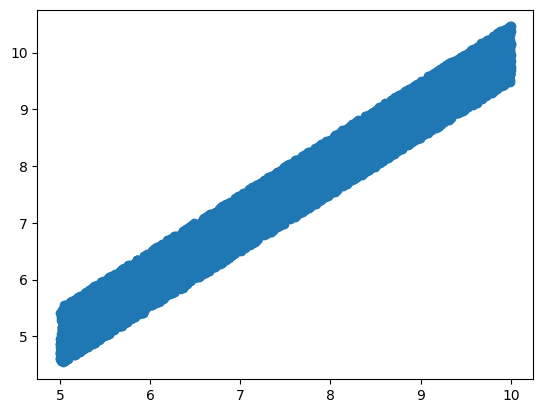

In [18]:
plt.scatter(feature_selected_data["Prev_Sem_Result"],feature_selected_data['CGPA'])

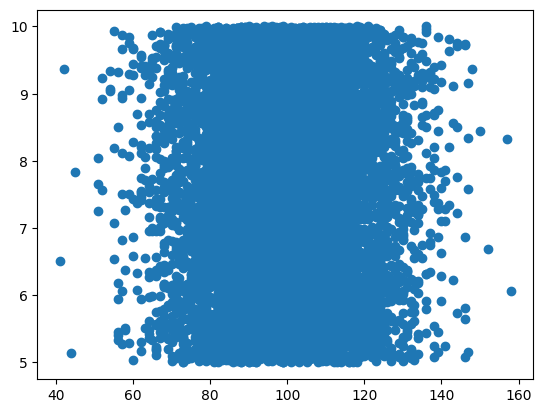

In [19]:
plt.scatter(feature_selected_data["IQ"],feature_selected_data['Prev_Sem_Result'])

In [20]:
np.linalg.det(feature_selected_data.iloc[: ,0:5].cov())

967.3939913725411

In [28]:
placement_equals_1_prior = data[data[data.columns[-1]]==1].shape[0]/data.shape[0]

In [29]:
placement_equals_1_prior

0.1659

In [32]:
placement_equals_1_data = feature_selected_data[data["Placement"]==1]

In [33]:
placement_equals_1_data

,IQ,Prev_Sem_Result,CGPA,Communication_Skills,Projects_Completed,Placement
6,123,6.68,6.58,8,2,1
7,111,8.77,8.76,1,2,1
18,86,8.20,8.15,9,4,1
20,121,8.41,8.07,3,3,1
23,78,8.67,9.17,10,2,1
...,...,...,...,...,...,...
9964,123,9.93,10.01,4,5,1
9978,84,9.87,9.69,9,4,1
9992,109,9.92,10.09,10,3,1
9994,117,8.71,8.44,4,4,1


(array([ 26., 181., 382., 840., 215.,  15.]),
 array([ 56.,  73.,  90., 107., 124., 141., 158.]),
 <BarContainer object of 6 artists>)

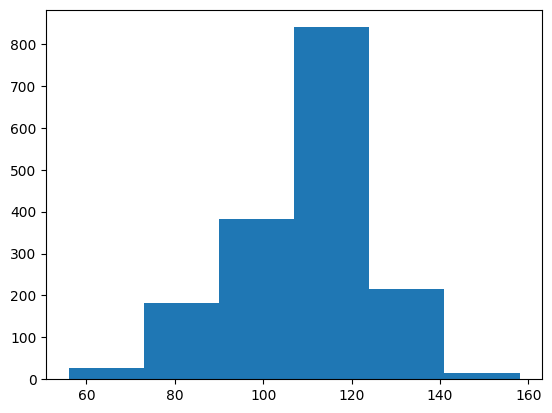

In [36]:
plt.hist(placement_equals_1_data["IQ"],bins = 6)